# Plotting Query Results

## Setup

In [53]:
# Import Matplot lib
import matplotlib
from matplotlib import style
style.use('seaborn')
import matplotlib.pyplot as plt

In [54]:
import pandas as pd

In [55]:
# Import SQLAlchemy `automap` and other dependencies here
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine
from sqlalchemy import create_engine, inspect

# YOUR CODE HERE

In [56]:
# Create an engine for the `emoji.sqlite` database
engine = create_engine("sqlite:///../Resources/emoji.sqlite", echo=False)

## Explore Database

In [57]:
# Use the Inspector to explore the database and print the table names
inspector = inspect(engine)
# YOUR CODE HERE

In [58]:
# Use Inspector to print the column names and types
inspector.get_table_names()

columns = inspector.get_columns('emoji')
for i in columns:
    print(i['name'], i['type'])
# YOUR CODE HERE

id INTEGER
emoji_char TEXT
emoji_id TEXT
name TEXT
score INTEGER


In [59]:
# Use `engine.execute` to select and display the first 10 rows from the emoji table

first_ten = engine.execute('Select * from emoji limit 10')

for i in first_ten:
    print(i)

# YOUR CODE HERE

(1, '😂', '1F602', 'FACE WITH TEARS OF JOY', 1814832150)
(2, '❤️', '2764', 'HEAVY BLACK HEART', 840619939)
(3, '😍', '1F60D', 'SMILING FACE WITH HEART-SHAPED EYES', 680382416)
(4, '♥️', '2665', 'BLACK HEART SUIT', 652715459)
(5, '😭', '1F62D', 'LOUDLY CRYING FACE', 515991922)
(6, '😊', '1F60A', 'SMILING FACE WITH SMILING EYES', 484540701)
(7, '♻️', '267B', 'BLACK UNIVERSAL RECYCLING SYMBOL', 452489849)
(8, '😒', '1F612', 'UNAMUSED FACE', 441690175)
(9, '💕', '1F495', 'TWO HEARTS', 381679908)
(10, '😘', '1F618', 'FACE THROWING A KISS', 377847645)


## Reflect database and Query

In [60]:
# Reflect Database into ORM class
Base = automap_base()
Base.prepare(engine, reflect=True)
Emoji = Base.classes.emoji

In [61]:
# Start a session to query the database
session = Session(engine)

Use Matplotlib to create a horizontal bar chart and plot the emoji `score` in descending order. Use `emoji_char` as the y-axis labels. Plot only the top 10 emojis ranked by score

In [62]:
# Query Emojis for `emoji_char`, `emoji_id`, and `score` and save the query into results

emoji_q = session.query(Emoji.emoji_char, Emoji.emoji_id, Emoji.score).all()

emoji_q
# YOUR CODE HERE

[('😂', '1F602', 1814832150),
 ('❤️', '2764', 840619939),
 ('😍', '1F60D', 680382416),
 ('♥️', '2665', 652715459),
 ('😭', '1F62D', 515991922),
 ('😊', '1F60A', 484540701),
 ('♻️', '267B', 452489849),
 ('😒', '1F612', 441690175),
 ('💕', '1F495', 381679908),
 ('😘', '1F618', 377847645),
 ('😩', '1F629', 343967555),
 ('☺️', '263A', 333263710),
 ('👌', '1F44C', 311468371),
 ('😔', '1F614', 283873968),
 ('😏', '1F60F', 275930731),
 ('😁', '1F601', 268504794),
 ('⬅️', '2B05', 225109999),
 ('😉', '1F609', 210995480),
 ('👍', '1F44D', 186214004),
 ('😌', '1F60C', 180720579),
 ('🙏', '1F64F', 175057316),
 ('🎶', '1F3B6', 170127733),
 ('😢', '1F622', 166417040),
 ('😎', '1F60E', 160872106),
 ('😅', '1F605', 160434523),
 ('👀', '1F440', 159984970),
 ('😳', '1F633', 156664610),
 ('🙌', '1F64C', 154175844),
 ('💔', '1F494', 152572644),
 ('🙈', '1F648', 148162690),
 ('✌️', '270C', 143975239),
 ('✨', '2728', 139984564),
 ('💙', '1F499', 139339131),
 ('💜', '1F49C', 137264417),
 ('💯', '1F4AF', 134780880),
 ('😴', '1F634', 1308

Unpack tuples using list comprehensions

In [63]:
# Unpack the `emoji_id` and `scores` from results and save into separate lists

emoji_char= [emoji_q[x][0] for x in range(len(emoji_q))]
emoji_scores = [emoji_q[x][2] for x in range(len(emoji_q))]
emoji_id = [emoji_q[x][1] for x in range(len(emoji_q))]

# YOUR CODE HERE

## Plot using Matplotlib

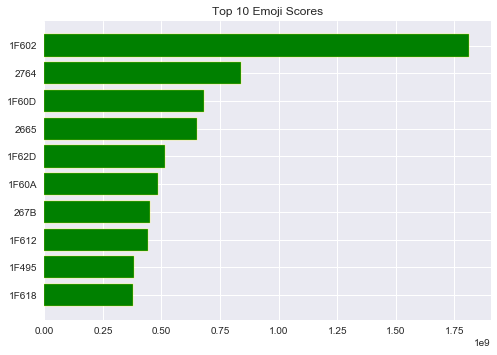

In [52]:
# Create a horizontal bar chart and plot the `emoji_id` on the y-axis and the `score` on the x-axis
# Challenge: Try to plot the scores in descending order on the graph (The largest score is at the top)

score_10 = emoji_scores[:10]
id_10 = emoji_id[:10]
char_10 = emoji_char[:10]
plt.barh(id_10, score_10, color = 'green', edgecolor = 'yellow')
plt.title('Top 10 Emoji Scores')
plt.gca().invert_yaxis()
plt.show()

# YOUR CODE HERE

## Plot using Pandas Plotting

Load the results into a Pandas DataFrame

In [13]:
# Load the results into a pandas dataframe. Set the index to the `emoji_id`
# YOUR CODE HERE
df= pd.DataFrame(emoji_q)
df.head(10)
emoji_df=df.set_index("emoji_id")
emoji_df

,emoji_char,score
emoji_id,,
1F602,😂,1814832150
2764,❤️,840619939
1F60D,😍,680382416
2665,♥️,652715459
1F62D,😭,515991922
...,...,...
1F6C2,🛂,103654
1F520,🔠,103234
1F521,🔡,101160


Plot using Pandas

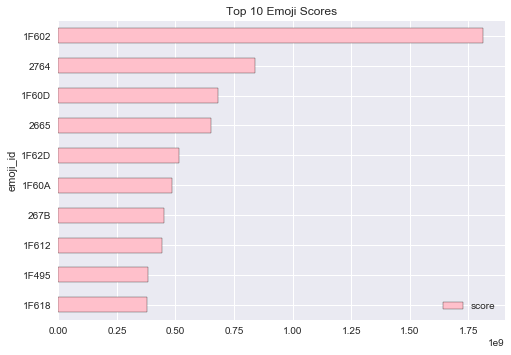

In [50]:
# Plot the dataframe as a horizontal bar chart using pandas plotting

score_id= emoji_df[["emoji_char", "score"]].head(10)
score_plot=score_id.plot(kind= 'barh', color = 'pink', edgecolor = 'black', title = 'Top 10 Emoji Scores')
score_plot.invert_yaxis()
# YOUR CODE HERE

In [66]:
# BONUS: Use Pandas `read_sql_query` to load a query statement directly into the DataFrame
# YOUR CODE HERE
conn = engine.connect()
top_emoji = pd.read_sql('Select emoji_id, score as "Top 10 Emoji Scores" from emoji order by score desc limit 10', conn)
top_emoji

,emoji_id,Top 10 Emoji Scores
0,1F602,1814832150
1,2764,840619939
2,1F60D,680382416
3,2665,652715459
4,1F62D,515991922
5,1F60A,484540701
6,267B,452489849
7,1F612,441690175
8,1F495,381679908
9,1F618,377847645
